## Prep

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ksdensity(data, width=0.3):
    """Returns kernel smoothing function from data points in data"""
    def ksd(x_axis):
        def n_pdf(x, mu=0., sigma=1.):  # normal pdf
            u = (x - mu) / abs(sigma)
            y = (1 / (np.sqrt(2 * np.pi) * abs(sigma)))
            y *= np.exp(-u * u / 2)
            return y
        prob = [n_pdf(x_i, data, width) for x_i in x_axis]
        pdf = [np.average(pr) for pr in prob]  # each row is one x value
        return np.array(pdf)
    return ksd

# Part 1

In [3]:
import scipy.stats as stats
import math

In [4]:
N = 1000

norm = np.random.randn(N)
unif = np.random.rand(N)

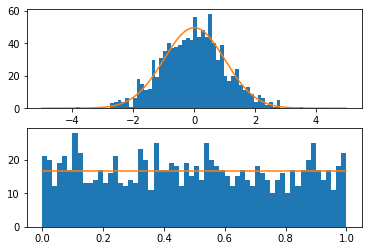

In [5]:
fig, ax = plt.subplots(2)

# Gausian parameters
mu = 0
variance = 1
sigma = math.sqrt(variance)
x_norm = np.linspace(mu-5*sigma, mu+5*sigma, N)

x_unif = np.linspace(0, 1, N)

# scaled 
no_bins = 60
bin_width = (max(norm)-min(norm))/no_bins
norm_scaling = N*bin_width


ax[0].hist(norm, bins=no_bins) 
ax[0].plot(x_norm, stats.norm.pdf(x_norm, mu, sigma)*norm_scaling)
ax[1].hist(unif, bins=no_bins)
ax[1].plot(x_unif, [N/no_bins]*N)

fig.savefig('plots/histogram_norm_unif.png')

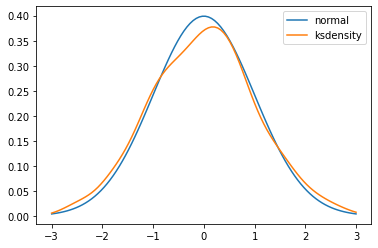

In [6]:
fig, ax = plt.subplots(1)
x_axis = np.linspace(-3,3,100)

# using normal function
ks_density = ksdensity(norm)
ax.plot(x_axis, stats.norm.pdf(x_axis, mu, sigma), label='normal')
ax.plot(x_axis, ks_density(x_axis), label='ksdensity')
ax.legend()

fig.savefig('plots/normal_vs_ksdensity.png')

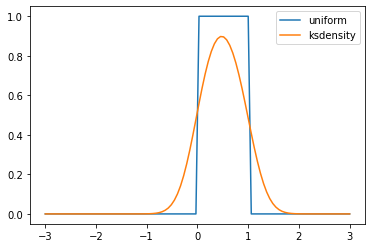

In [7]:
fig, ax = plt.subplots(1)
x_axis = np.linspace(-3,3,100)

# using uniform function
ks_density = ksdensity(unif)
ax.plot(x_axis, stats.uniform.pdf(x_axis), label='uniform')
ax.plot(x_axis, ks_density(x_axis), label='ksdensity')
ax.legend()

fig.savefig('plots/uniform_vs_ksdensity.png')

Comment on the advantages and disadvantages of the kernel density method compared with the histogram method for estimation of a probability density from random samples:

<b>Histogram</b> method represents the fluctuations in the sample more prominantly.

<b>Histogram</b> method is discrete, therefore it can be used numerically without becoming computationally expensive.

<b>KSDensity</b> method produces a smoother plot because of the use of the kernel. This reduces the effect of fluctuations, therefore produces a more repeatable set of random numbers than the histogram method.

In [8]:
def print_mean_variance_uniform(N, no_bins=60):
    
    p_j = 1/no_bins
    
    mean = N*p_j
    variance = N*p_j*(1-p_j)
    stdv = np.sqrt(variance)
    
    print('for N = {} \n mean = {} \n variance = {} \n standard deviation = {}'.format(N, mean, variance, stdv))

In [9]:
for N in [100,1000,10000]:
    print_mean_variance_uniform(N)

for N = 100 
 mean = 1.6666666666666667 
 variance = 1.6388888888888888 
 standard deviation = 1.2801909579781015
for N = 1000 
 mean = 16.666666666666668 
 variance = 16.38888888888889 
 standard deviation = 4.0483192671637065
for N = 10000 
 mean = 166.66666666666666 
 variance = 163.88888888888886 
 standard deviation = 12.801909579781013


As N increases, mean and variance increase directly proportional to N, but stdv increases proportional to the sqrt(N). Therefore the histogram estimate becomes more consistant, as stdv becomes smaller relative to mean.

In [10]:
def plot_unif_with_mean_stdv(list_N, no_bins=60):
    number_plots = len(list_N)
    fig, ax = plt.subplots(number_plots)
    p_j = 1/no_bins
    
    for i,N in enumerate(list_N):
        x_ = np.random.rand(N)
        ax[i].hist(x_, bins=no_bins)
        
        mean = N*p_j
        variance = N*p_j*(1-p_j)
        stdv = np.sqrt(variance)
        
        x_axis = np.linspace(min(x_), max(x_), 100)
        ax[i].plot(x_axis, [mean]*100, label='mean')
        ax[i].plot(x_axis, [mean+3*stdv]*100, label='+3stdv')
        ax[i].plot(x_axis, [mean-3*stdv]*100, label='-3stdv')
        ax[i].legend()
        ax[i].set_title('N = {}'.format(N))
    
    fig.tight_layout(pad=0.)
    fig.savefig('plots/unif_with_mean_N_range.png')

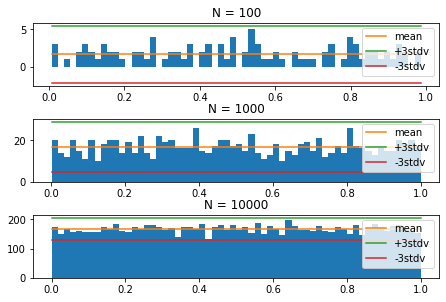

In [11]:
plot_unif_with_mean_stdv([100,1000,10000])

We can see that as the value of N increases, the histogram estimate becomes more consistent.

# Part 2

### Calculating the Jacobian for the following functions of $x$

$y = ax + b$

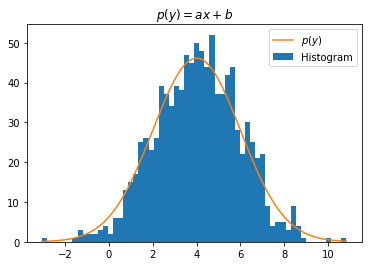

In [12]:
N = 1000
no_bins = 60
x = np.random.randn(N)

a = 2
b = 4

def f(x):
    return a*x+b

y = f(x)
plt.hist(y,bins=no_bins,label='Histogram')

# from p(y) function calculated using the jacobian
def p(y):
    return 1/(abs(a)*np.sqrt(2*np.pi))*np.exp(-(1/2)*(((y-b)/a)**2))

rescale_factor = (max(y)-min(y))/no_bins
x_ax = np.linspace(min(y), max(y), N)

plt.plot(x_ax, p(x_ax)*N*rescale_factor, label='$p(y)$')
plt.legend()
plt.title('$p(y) = ax + b$')
plt.savefig('plots/ax_plus_b_jacobian.png')

$y = x^2$

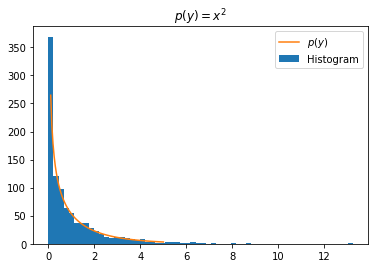

In [13]:
N = 1000
no_bins = 60
x = np.random.randn(N)

def f(x):
    return x**2

y = f(x)
plt.hist(y, bins=no_bins, label='Histogram')

# from p function calculated using the jacobian
def p(y):
    return (1/np.sqrt(2*np.pi*y)) * np.exp(-abs(y)/2)

rescale_factor = (max(y)-min(y))/no_bins
x_ax = np.linspace(0.1,5,100) #0.1 min to prevent /0 issues

plt.plot(x_ax,p(x_ax)*N*rescale_factor, label='$p(y)$')
plt.legend()
plt.title('$p(y) = x^2$')
plt.savefig('plots/x_squared_jacobian.png')

# Part 3

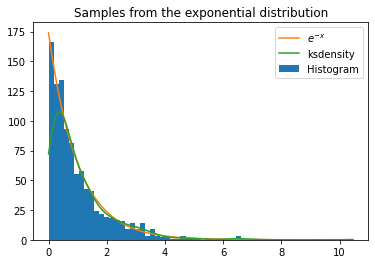

In [14]:
N = 1000
no_bins = 60

x = np.random.rand(N)

def inverse_F(x):
    return np.log(1/(1-x))

y = inverse_F(x)

plt.hist(y,bins=no_bins,label='Histogram')

def p(y):
    return np.exp(-y)

rescale_factor = (max(y)-min(y))/no_bins

x_ax = np.linspace(min(y),max(y),N)
plt.plot(x_ax,p(x_ax)*N*rescale_factor,label='$e^{-x}$')

ks_density = ksdensity(y)
plt.plot(x_ax,ks_density(x_ax)*N*rescale_factor,label='ksdensity')
plt.legend()
plt.title('Samples from the exponential distribution')
plt.savefig('plots/inverse_CFD_method.png')

# Part 4

The range of integration is between $0$ and $\infty$ because all values in $U$ must be taken into account, yet $u$ cannot have a -ve value because variance is always positive. 

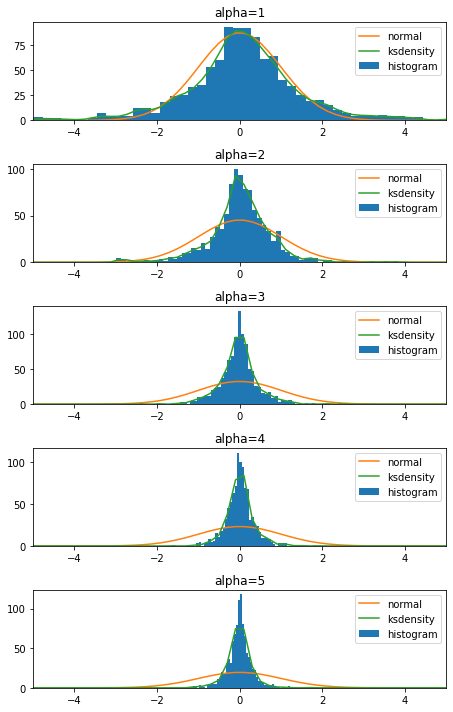

In [36]:
N = 1000
no_bins = 60

def F_inv(v):
    return -2/(alpha**2)*np.log(1-v)

def sample(alpha):
    x = np.random.rand(1) # uniform
    u = np.sqrt(F_inv(x)) # exponential
    p_x_u = u*np.random.randn(1) # p(x|u)
    return p_x_u
    
fig, ax = plt.subplots(5)
fig.set_size_inches(6.4, 10)

alpha_v = [1,2,3,4,5]

y = np.zeros((5,N))

for i,alpha in enumerate(alpha_v):
    
    for n in range(N):
        y[i][n] = sample(alpha)

    ax[i].hist(y[i], bins=no_bins, label='histogram')

    rescale_factor = (max(y[i])-min(y[i]))/no_bins

    # normal plot
    x_ax = np.linspace(-10, 10, 100)
    ax[i].plot(x_ax, stats.norm.pdf(x_ax)*N*rescale_factor, label='normal')
    
    # ksdensity plot
    ks_density = ksdensity(y[i], width=0.2/alpha) #adaptive width
    ax[i].plot(x_ax, ks_density(x_ax)*N*rescale_factor, label='ksdensity')
    
    ax[i].set_xlim((-5, 5))
    ax[i].set_title('alpha={}'.format(alpha))
    ax[i].legend()
    
fig.tight_layout()
fig.savefig('plots/alpha_range_histogram_normal_ksdensity.png')

As alpha increases $X$ becomes more tightly distributed.

The kernel width, for the $ksdensity$ function, had to be decreases inversely proportion to the alpha value to achieve the better fit shown in the above plot.

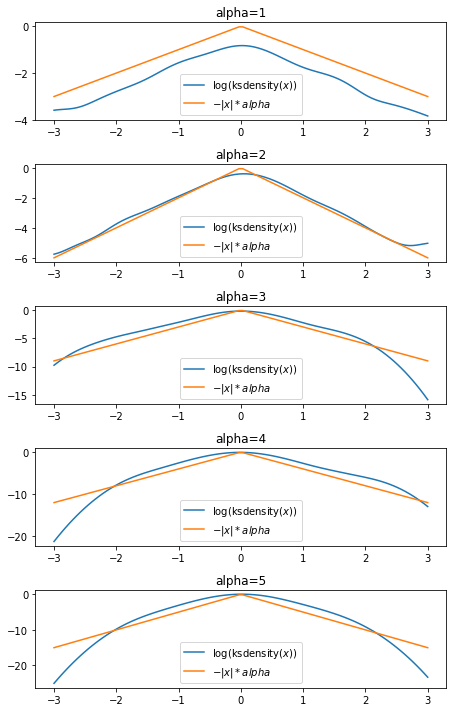

In [37]:
N = 1000

fig, ax = plt.subplots(5)
fig.set_size_inches(6.4, 10)

alpha_v = [1,2,3,4,5]

x_ax = np.linspace(-3, 3, 100)

y = np.zeros((5,N))
for i,alpha in enumerate(alpha_v):
    
    for n in range(N):
        y[i][n] = sample(alpha)

    # log of ksdensity
    ks_density = ksdensity(y[i])
    ax[i].plot(x_ax, np.log(ks_density(x_axis)), label='log(ksdensity($x$))')
    ax[i].plot(x_ax, -(abs(x_ax))*alpha, label='$-|x|*alpha$')

    ax[i].set_title('alpha={}'.format(alpha))
    ax[i].legend()

fig.tight_layout()
fig.savefig('plots/log_ksdensity_x.png')

From these plots, we can see that for values of $x < 3$, the function $f(x) = - |x| \times \alpha$ fits the plot of log$(ksdensity)$ quite well.